Found 15 .npy files in /home/ubuntu/Desktop/JY/ultrasound_inp/ddrm/outputs_ultrasound_ddrm/artifacts
Displaying z_est_V3.npy...


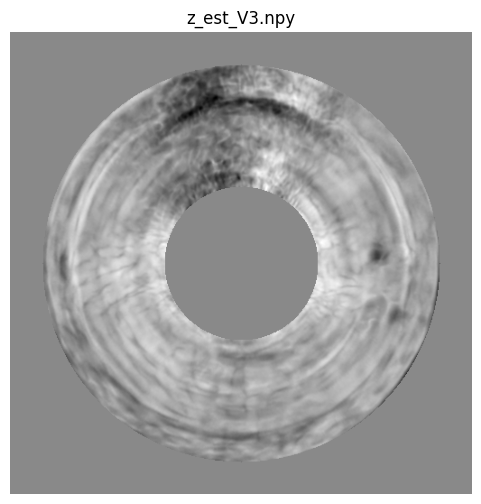

Displaying distortion_map_V3.npy...


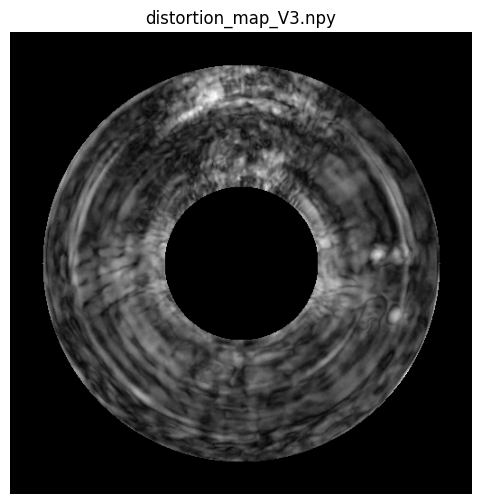

Displaying z_est_V4.npy...


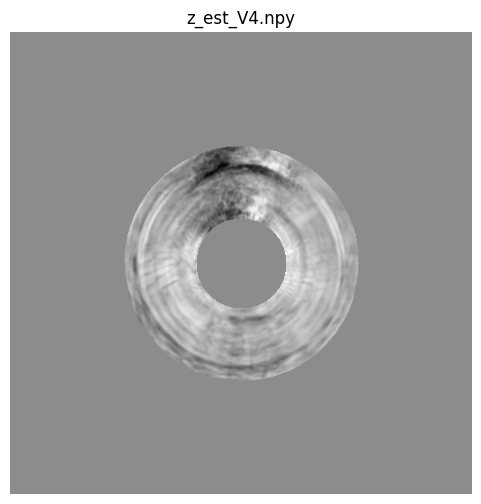

Displaying distortion_map_V4.npy...


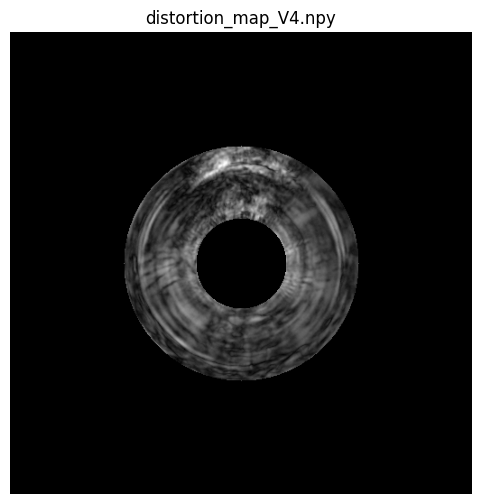

Displaying z_est_V5.npy...


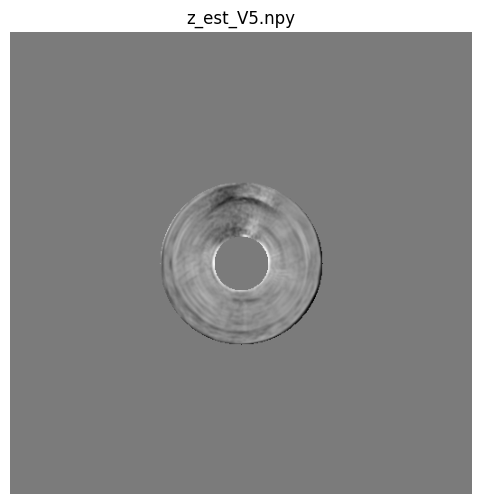

Displaying distortion_map_V5.npy...


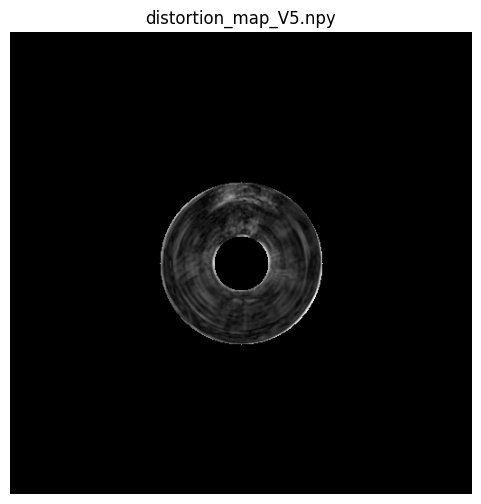

Displaying z_est_V6.npy...


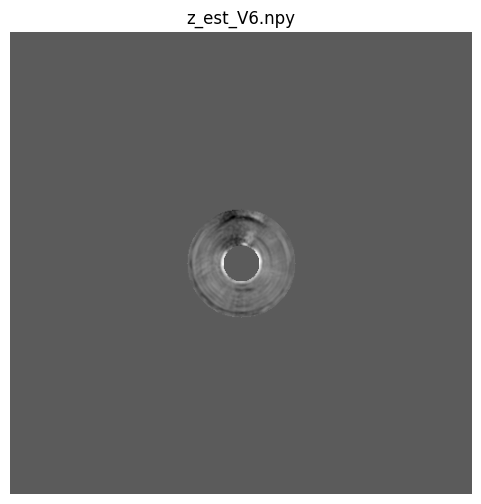

Displaying distortion_map_V6.npy...


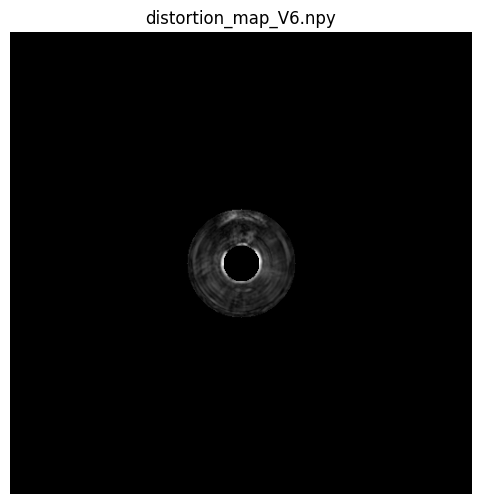

Displaying z_est_V7.npy...


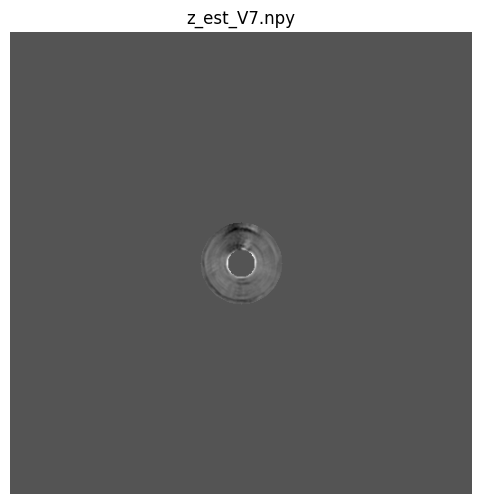

Displaying distortion_map_V7.npy...


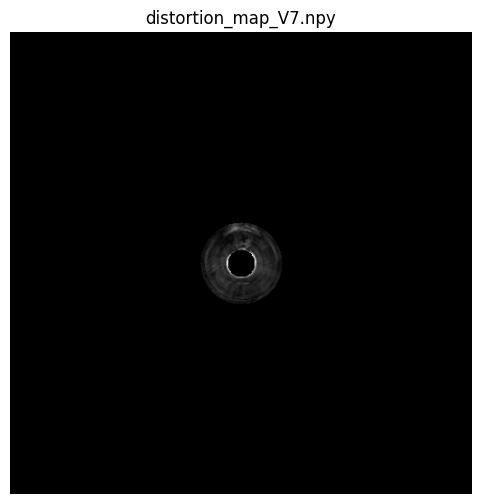

Displaying H_est_V3.npy...


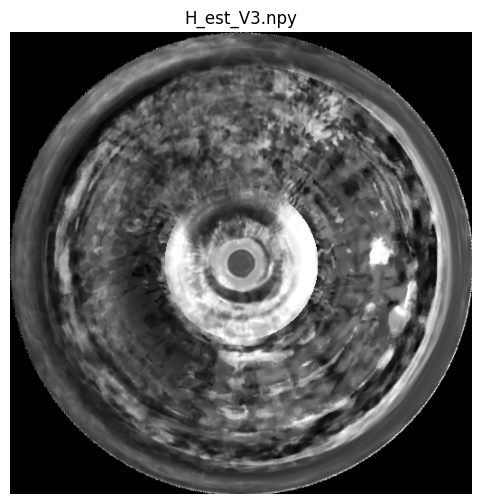

Displaying H_est_V4.npy...


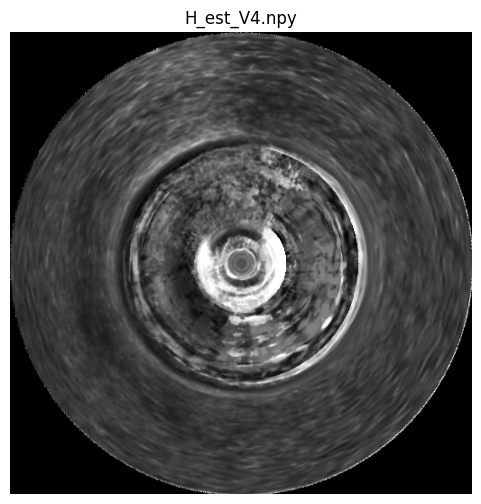

Displaying H_est_V5.npy...


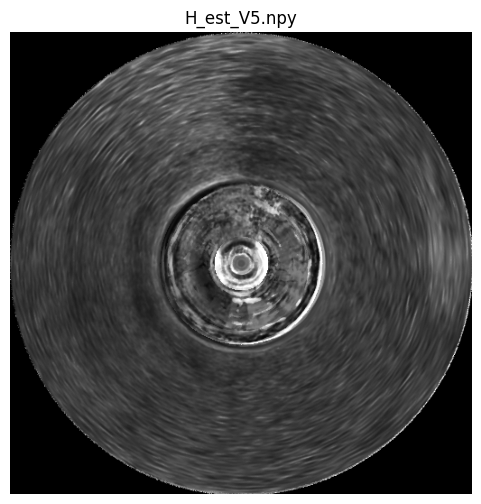

Displaying H_est_V6.npy...


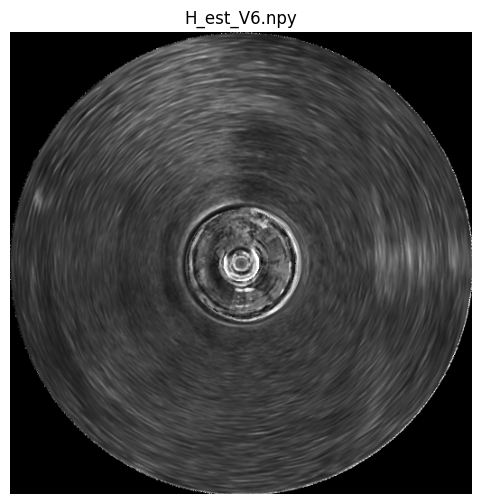

Displaying H_est_V7.npy...


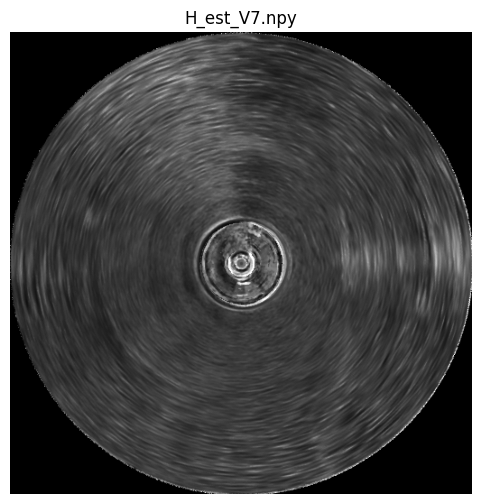


All images have been displayed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# .npy 파일이 들어있는 디렉토리를 정의합니다.
# 이 경로는 실제 환경에 맞게 수정해주세요.
npy_dir = '/home/ubuntu/Desktop/JY/ultrasound_inp/ddrm/outputs_ultrasound_ddrm/artifacts'

# 디렉토리 내의 모든 .npy 파일을 찾습니다.
npy_files = glob.glob(os.path.join(npy_dir, '*.npy'))
print(f"Found {len(npy_files)} .npy files in {npy_dir}")

# 각 파일에 대해 반복 작업을 수행합니다.
for npy_file in npy_files:
    try:
        # .npy 파일을 로드합니다.
        data = np.load(npy_file)

        # 파일 이름을 가져와 제목으로 사용합니다.
        file_name = os.path.basename(npy_file)
        print(f"Displaying {file_name}...")

        # 이미지 표시를 위해 데이터를 0-1 범위로 정규화합니다.
        # 기존의 정규화 로직은 매우 훌륭하므로 그대로 사용합니다.
        if data.dtype == np.uint8:
            normalized_data = data / 255.0
        elif data.dtype == np.float32 or data.dtype == np.float64:
            min_val = data.min()
            max_val = data.max()
            if max_val - min_val > 0:
                normalized_data = (data - min_val) / (max_val - min_val)
            else:
                normalized_data = np.zeros_like(data)
        else:
            normalized_data = data.astype(np.float32)
            min_val = normalized_data.min()
            max_val = normalized_data.max()
            if max_val - min_val > 0:
                normalized_data = (normalized_data - min_val) / (max_val - min_val)
            else:
                normalized_data = np.zeros_like(normalized_data)

        # --- 수정된 부분 ---
        # 파일로 저장하는 대신 화면에 직접 이미지를 표시합니다.

        plt.figure(figsize=(6, 6))  # 각 이미지마다 새로운 그림 창을 생성합니다.
        plt.title(file_name)      # 그림의 제목을 파일 이름으로 설정합니다.
        plt.axis('off')           # 깔끔한 출력을 위해 축을 숨깁니다.

        # 데이터 형태에 따라 흑백(grayscale) 또는 컬러로 표시합니다.
        if normalized_data.ndim == 2 or (normalized_data.ndim == 3 and normalized_data.shape[-1] == 1):
            plt.imshow(normalized_data.squeeze(), cmap='gray')
        elif normalized_data.ndim == 3 and normalized_data.shape[-1] in [3, 4]: # RGB 또는 RGBA
            plt.imshow(normalized_data)
        else:
            print(f"Warning: {file_name} has an unsupported shape {data.shape}. Skipping.")
            plt.close() # 건너뛸 경우, 비어있는 figure를 닫아줍니다.
            continue

        plt.show() # 현재 그림을 화면에 보여줍니다.
        # --------------------

    except Exception as e:
        print(f"Error processing {npy_file}: {e}")

print("\nAll images have been displayed.")